## Installing and importing libraries

In [ ]:
import numpy as np
import pandas as pd
!pip install -q transformers sentencepiece
from transformers import pipeline
from google.colab import files
import matplotlib.pyplot as plt

## Importing and cleaning reviews

In [ ]:
primevideo = pd.read_csv('PrimeVideo_Google_Play.csv')

In [ ]:
primevideo

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
162777,162777,06a2e1d7-d186-404a-a946-a8292a3ddc37,Neerak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Excellent streaming quality no disturbance min...,5,0,3.0.299.3045,2021-07-07 06:48:32,NaN,NaN
162778,162778,f0fd48f5-122c-483d-8212-4879c1aeba49,Vivek Sharma,https://play-lh.googleusercontent.com/a-/ACB-R...,It is awesome,4,0,3.0.299.3047,2021-07-07 06:45:03,NaN,NaN
162779,162779,cd5c8ac9-f58c-40cc-8580-6371d5914294,M Webb,https://play-lh.googleusercontent.com/a-/ACB-R...,App is unstable and is wrought with errors.,1,0,NaN,2021-07-07 06:44:40,NaN,NaN
162780,162780,aab6d694-4f1a-46e8-8baa-4c9562eb9c11,jay,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, many shows, hope there's more Ameri...",4,7,3.0.299.3047,2021-07-07 06:43:47,NaN,NaN


In [ ]:
primevideo.dropna(axis = 0, how = 'any', inplace = True, subset = 'content')   # we need to remove nan reviews to conduct a trustable topic modeling

## Creation of a subset with the most recent 2000 reviews (due to technical limitations)

In [ ]:
primevideo_subset = primevideo[:2000]

In [ ]:
primevideo_subset

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,a794369f-5dfb-43b0-b822-e518448cb97b,Mdaalim Hussain,https://play-lh.googleusercontent.com/a-/ACB-R...,Wow,5,0,NaN,2023-03-26 15:34:48,NaN,NaN
1996,1996,1732243f-4ac7-4ace-8f8b-ef2734358706,Rohit Bhojane,https://play-lh.googleusercontent.com/a-/ACB-R...,Whenever I click on Amazon Prime. The app cras...,1,0,NaN,2023-03-26 15:24:07,NaN,NaN
1997,1997,96651dd3-0968-4f8d-81d5-cc12bfbc9511,Siva Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Nice,5,0,3.0.342.12047,2023-03-26 15:24:04,NaN,NaN
1998,1998,29c82278-a7fe-4f0e-a26b-b48348cc8969,Sunirban Chatterjee,https://play-lh.googleusercontent.com/a-/ACB-R...,Very good 👍👍,1,0,NaN,2023-03-26 15:21:56,NaN,NaN


## Setting the classification model

In [ ]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


## Running the classification model

In [ ]:
reviews = primevideo_subset.content
classifier_outputs = []
topics = []
candidate_labels = ['price', 'technical', 'original content', 'usage', 'variety', 'audio', 'security', 'resolution', 'customization', 'generic']

for r in reviews:
  classifier_outputs.append(classifier(r, candidate_labels=candidate_labels))

  topics.append(classifier_outputs[-1]['labels'][0])

In [ ]:
primevideo_subset['classifier output'] = classifier_outputs
primevideo_subset['topic'] = topics

<ipython-input-12-51b789f51480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primevideo_subset['classifier output'] = classifier_outputs
<ipython-input-12-51b789f51480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primevideo_subset['topic'] = topics


## Saving and exporting the results

In [ ]:
primevideo_subset.to_csv('PrimeVideo_topic_modeling.csv')
files.download('PrimeVideo_topic_modeling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
primevideo_topics = pd.read_csv('PrimeVideo_topic_modeling.csv')

In [ ]:
primevideo_topics

,Unnamed: 0.1,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,classifier output,topic
0,0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN,"{'sequence': 'Love the app', 'labels': ['varie...",variety
1,1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN,"{'sequence': 'Love it', 'labels': ['original c...",original content
2,2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN,{'sequence': 'Its very nice app we can watch 1...,variety
3,3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN,"{'sequence': 'Good', 'labels': ['variety', 'or...",variety
4,4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN,"{'sequence': ""I have found lots of free older ...",variety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,a794369f-5dfb-43b0-b822-e518448cb97b,Mdaalim Hussain,https://play-lh.googleusercontent.com/a-/ACB-R...,Wow,5,0,NaN,2023-03-26 15:34:48,NaN,NaN,"{'sequence': 'Wow', 'labels': ['original conte...",original content
1996,1996,1996,1732243f-4ac7-4ace-8f8b-ef2734358706,Rohit Bhojane,https://play-lh.googleusercontent.com/a-/ACB-R...,Whenever I click on Amazon Prime. The app cras...,1,0,NaN,2023-03-26 15:24:07,NaN,NaN,{'sequence': 'Whenever I click on Amazon Prime...,usage
1997,1997,1997,96651dd3-0968-4f8d-81d5-cc12bfbc9511,Siva Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Nice,5,0,3.0.342.12047,2023-03-26 15:24:04,NaN,NaN,"{'sequence': 'Nice', 'labels': ['variety', 'or...",variety
1998,1998,1998,29c82278-a7fe-4f0e-a26b-b48348cc8969,Sunirban Chatterjee,https://play-lh.googleusercontent.com/a-/ACB-R...,Very good 👍👍,1,0,NaN,2023-03-26 15:21:56,NaN,NaN,"{'sequence': 'Very good 👍👍', 'labels': ['origi...",original content


## Labeling reviews basing on the score

In [ ]:
primevideo_topics['label'] = 'neutral'

high_mask = primevideo_topics['score'] >= 4
primevideo_topics['label'].loc[high_mask] = 'positive'

low_mask = primevideo_topics['score'] <= 2
primevideo_topics['label'].loc[low_mask] = 'negative'

<ipython-input-8-0fb260840d8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primevideo_topics['label'].loc[high_mask] = 'positive'
<ipython-input-8-0fb260840d8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primevideo_topics['label'].loc[low_mask] = 'negative'


In [ ]:
primevideo_topics

,Unnamed: 0.1,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,classifier output,topic,label
0,0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN,"{'sequence': 'Love the app', 'labels': ['varie...",variety,positive
1,1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN,"{'sequence': 'Love it', 'labels': ['original c...",original content,positive
2,2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN,{'sequence': 'Its very nice app we can watch 1...,variety,positive
3,3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN,"{'sequence': 'Good', 'labels': ['variety', 'or...",variety,positive
4,4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN,"{'sequence': ""I have found lots of free older ...",variety,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,a794369f-5dfb-43b0-b822-e518448cb97b,Mdaalim Hussain,https://play-lh.googleusercontent.com/a-/ACB-R...,Wow,5,0,NaN,2023-03-26 15:34:48,NaN,NaN,"{'sequence': 'Wow', 'labels': ['original conte...",original content,positive
1996,1996,1996,1732243f-4ac7-4ace-8f8b-ef2734358706,Rohit Bhojane,https://play-lh.googleusercontent.com/a-/ACB-R...,Whenever I click on Amazon Prime. The app cras...,1,0,NaN,2023-03-26 15:24:07,NaN,NaN,{'sequence': 'Whenever I click on Amazon Prime...,usage,negative
1997,1997,1997,96651dd3-0968-4f8d-81d5-cc12bfbc9511,Siva Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Nice,5,0,3.0.342.12047,2023-03-26 15:24:04,NaN,NaN,"{'sequence': 'Nice', 'labels': ['variety', 'or...",variety,positive
1998,1998,1998,29c82278-a7fe-4f0e-a26b-b48348cc8969,Sunirban Chatterjee,https://play-lh.googleusercontent.com/a-/ACB-R...,Very good 👍👍,1,0,NaN,2023-03-26 15:21:56,NaN,NaN,"{'sequence': 'Very good 👍👍', 'labels': ['origi...",original content,negative


## Plotting the average score for each topic


In [ ]:
aggregated_reviews2 = primevideo_topics.groupby(['topic']).score.mean()

In [ ]:
aggregated_reviews2.index

Index(['audio', 'customization', 'generic', 'original content', 'price',
       'resolution', 'security', 'technical', 'usage', 'variety'],
      dtype='object', name='topic')

In [ ]:
aggregated_reviews2.index = ['security', 'technical', 'generic', 'usage', 'audio', 'price',
       'resolution', 'customiz.', 'original content', 'variety']

In [ ]:
aggregated_reviews2.sort_values(inplace = True)

In [ ]:
aggregated_reviews2

resolution          1.285714
customiz.           1.815789
generic             2.557692
audio               2.675676
original content    2.788060
security            3.152941
technical           3.162162
price               3.510638
variety             4.575697
usage               4.583333
Name: score, dtype: float64

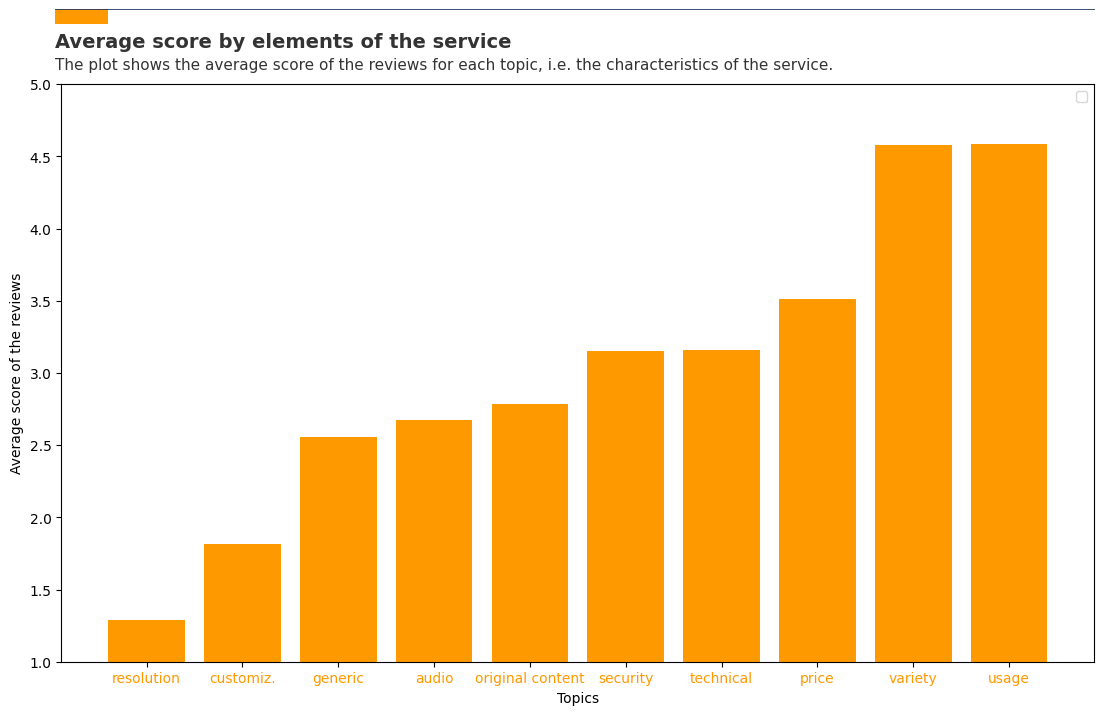

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
y_pos = np.arange(len(aggregated_reviews2.index))
plt.bar(y_pos, aggregated_reviews2.values, color='#FF9900')
plt.xticks(y_pos, aggregated_reviews2.index, color='#FF9900')
# Create the grid 
ax.set_ylim(1, 5)
# set the title, legend, and axis labels
plt.xlabel('Topics')
plt.ylabel('Average score of the reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Average score by elements of the service', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The plot shows the average score of the reviews for each topic, i.e. the characteristics of the service.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#FF9900', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#1A3263', linewidth=.6)

# display the graph
plt.show()